# Laboratorio 06: Álgebra Lineal.

---
### Profesor: Daniel Ruiz Mejía
### Nombre: Estefania Zapata
*Métodos computacionales 2025-I*

---

In [14]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt
from scipy.linalg import eig, inv, eigh



# 1.

<center>

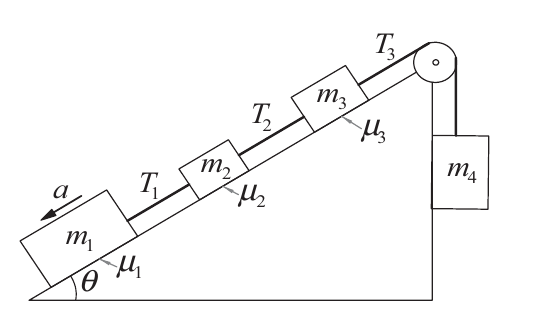

</center>

Cuatro bloques de masas diferentes $m_i$ están conectados por cuerdas de masa despreciable. Tres de los bloques se encuentran sobre un plano inclinado con un ángulo $\theta$, donde los coeficientes de fricción entre los bloques y el plano son $\mu_i$. Las ecuaciones de movimiento para el sistema son:

$$
T_1 + m_1a = m_1g(\sin \theta - \mu_1 \cos \theta)
$$
$$
-T_1 + T_2 + m_2a = m_2g(\sin \theta - \mu_2 \cos \theta)
$$
$$
-T_2 + T_3 + m_3a = m_3g(\sin \theta - \mu_3 \cos \theta)
$$
$$
-T_3 + m_4a = -m_4g
$$

donde:
- $T_i$ representan las tensiones en las cuerdas
- $a$ es la aceleración del sistema
- $\theta = 45^\circ$ es el ángulo de inclinación
- $g = 9.81 m/s^2$ es la aceleración gravitatoria


Determine $a$ y $T_i$

**Datos:**

Masas de los bloques:
$$
\mathbf{m} = \begin{bmatrix}
10 & 4 & 5 & 6 \\
\end{bmatrix}^T kg
$$

Coeficientes de fricción:
$$
\mu = \begin{bmatrix}
0.25 & 0.3 & 0.2 \\
\end{bmatrix}^T
$$


In [15]:
g = 9.81
theta = np.pi / 4
m = np.array([10, 4, 5, 6])
mu = np.array([0.25, 0.3, 0.2])
sin_t = np.sin(theta)
cos_t = np.cos(theta)

# Matriz de coeficientes de T1, T2, T3 y a
A = np.array([
    [ 1,  0,  0,  m[0]],
    [-1,  1,  0,  m[1]],
    [ 0, -1,  1,  m[2]],
    [ 0,  0, -1,  m[3]]
])

# Vector b
b = np.array([
    m[0]*g*(sin_t - mu[0]*cos_t),
    m[1]*g*(sin_t - mu[1]*cos_t),
    m[2]*g*(sin_t - mu[2]*cos_t),
    -m[3]*g
])

x = la.solve(A, b)

#resultados
T1, T2, T3, a = x
print(f"Aceleración a = {a:.4f} m/s²")
print(f"Tensiones: T1 = {T1:.4f} N, T2 = {T2:.4f} N, T3 = {T3:.4f} N")


Aceleración a = 1.6134 m/s²
Tensiones: T1 = 35.8914 N, T2 = 48.8606 N, T3 = 68.5404 N


# 2.
Considere el circuito de la figura. Usando las leyes de Kirchoff escriba las ecuaciones para corriente y voltaje. Luego, determine la forma matricial y encuentre los valores de la corriente que circula por cada nodo, es decir, $i_{12}$, $i_{23}$ y asi sucesivamente.

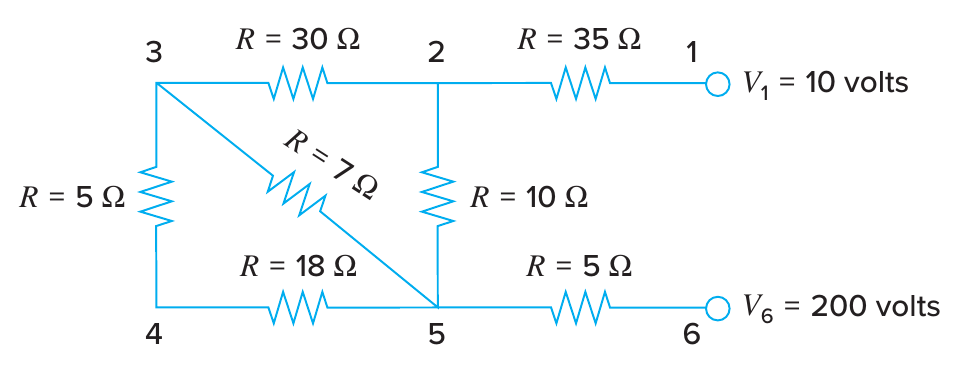


In [16]:
# Matriz de coeficientes A
A = np.array([
    [ 1, -1, -1,  0,  0,  0,  0],
    [ 0,  1,  0, -1,  0, -1,  0],
    [ 0,  0,  1,  0,  1,  1, -1],
    [35, 30,  0,  0,  0,  0,  0],
    [ 0,  0,  0,  5, 18, -7,  0],
    [ 0, -30,10,  0,  0,  7,  0],
    [35,  0, 10,  0,  0,  0,  5]
])

# Vector b
b = np.array([0, 0, 0, 10, 0, 0, 200])

x = la.solve(A, b)

nombres = ['i_12', 'i_23', 'i_25', 'i_34', 'i_45', 'i_35', 'i_56']
for nombre, valor in zip(nombres, x):
    print(f"{nombre} = {valor:.4f} A")


i_12 = 114.2072 A
i_23 = -132.9084 A
i_25 = 247.1155 A
i_34 = 789.7211 A
i_45 = -578.1673 A
i_35 = -922.6295 A
i_56 = -1253.6813 A


# 3.
Se sabe que un sistema físico es gobernado por las ecuaciones,

$$
\begin{matrix}
x' &=& 2x&-y&+z, \\
y' &=&   &3y&-z, \\
z' &=& 2x&+y&+3z,
\end{matrix}
$$

donde $x',y',z'$ son las derivadas, en forma vectorial esto se puede representar como $\mathbf{r}'=A\mathbf{r}$ que tiene solución analítica general, $\mathbf{r} = e^{At} \mathbf{r}(0)$.

- Realice la diagonalización de $A$.

- Use el hecho de que $f(A) =U f(D) U^{-1}$ para encontrar $x(t),y(t),z(t)$ en el intervalo de tiempo $[0,2]$.

- Grafique $x(t),y(t),z(t)$ (use la condición inicial $\mathbf{r}(0)=(1,1,2))$.

- Compare el resultado a la solución analítica,

$$
2x  = x(0)(e^{2t}(1+e^{2t}-2t)) + y(0) (-2te^{2t}) + z(0)(e^{2t}(-1+e^{2t})),
$$

$$
2y  = x(0)(-e^{2t}(-1+e^{2t}-2t)) + y(0)(2(t+1)e^{2t}) + z(0)(-e^{2t}(-1+e^{2t})),
$$

$$
2z  = x(0)(e^{2t}(-1+e^{2t}+2t)) + y(0)(2te^{2t}) + z(0)(e^{2t}(1+e^{2t})).
$$

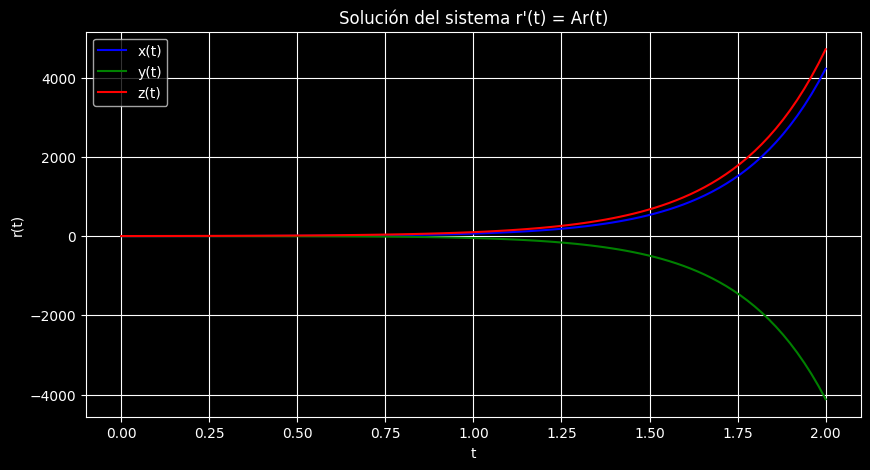

In [17]:
A = np.array([[2, -1, 1],
              [0, 3, -1],
              [2, 1, 3]])

r0 = np.array([1, 1, 2])

# Diagonalización
valores, vectores = eig(A)
U = vectores
D = np.diag(valores)
U_inv = inv(U)


t_vals = np.linspace(0, 2, 100)
sol = []

for t in t_vals:
    expDt = np.diag(np.exp(valores * t))
    r_t = U @ expDt @ U_inv @ r0
    sol.append(np.real(r_t))

sol = np.array(sol)
x_t, y_t, z_t = sol[:,0], sol[:,1], sol[:,2]

plt.style.use('dark_background')
plt.figure(figsize=(10,5))
plt.plot(t_vals, x_t, label='x(t)', color='blue')
plt.plot(t_vals, y_t, label='y(t)', color='green')
plt.plot(t_vals, z_t, label='z(t)', color='red')
plt.xlabel("t")
plt.ylabel("r(t)")
plt.title("Solución del sistema r'(t) = Ar(t)")
plt.legend()
plt.grid(True)
plt.show()


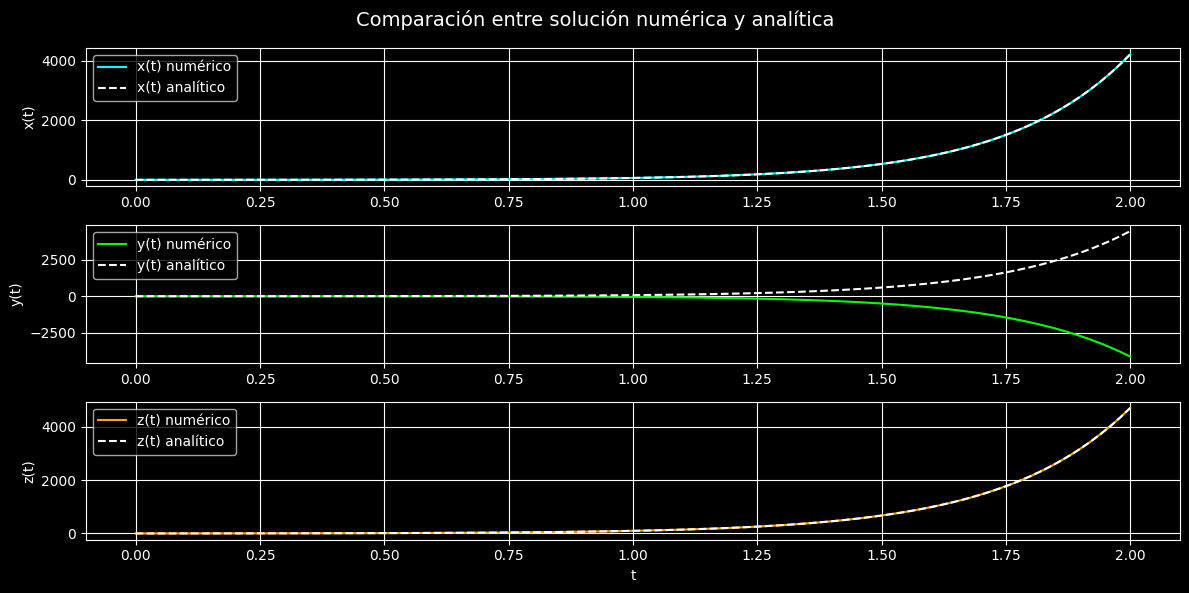

In [18]:
# Parámetros iniciales
x0, y0, z0 = 1, 1, 2

# Solución analítica
x_analit = (x0 * np.exp(2*t_vals)*(1 + np.exp(2*t_vals) - 2*t_vals) +
            y0 * (-2*t_vals*np.exp(2*t_vals)) +
            z0 * np.exp(2*t_vals)*(-1 + np.exp(2*t_vals))) / 2

y_analit = (x0 * np.exp(2*t_vals)*(-1 + np.exp(2*t_vals) - 2*t_vals) +
            y0 * 2*np.exp(2*t_vals)*(t_vals + 1) +
            z0 * np.exp(2*t_vals)*(-1 + np.exp(2*t_vals))) / 2

z_analit = (x0 * np.exp(2*t_vals)*(-1 + np.exp(2*t_vals) + 2*t_vals) +
            y0 * 2*t_vals*np.exp(2*t_vals) +
            z0 * np.exp(2*t_vals)*(1 + np.exp(2*t_vals))) / 2

# Gráfica comparativa
plt.style.use('dark_background')
plt.figure(figsize=(12, 6))

plt.subplot(3,1,1)
plt.plot(t_vals, x_t, label='x(t) numérico', color='cyan')
plt.plot(t_vals, x_analit, '--', label='x(t) analítico', color='white')
plt.ylabel("x(t)")
plt.legend()
plt.grid(True)

plt.subplot(3,1,2)
plt.plot(t_vals, y_t, label='y(t) numérico', color='lime')
plt.plot(t_vals, y_analit, '--', label='y(t) analítico', color='white')
plt.ylabel("y(t)")
plt.legend()
plt.grid(True)

plt.subplot(3,1,3)
plt.plot(t_vals, z_t, label='z(t) numérico', color='orange')
plt.plot(t_vals, z_analit, '--', label='z(t) analítico', color='white')
plt.xlabel("t")
plt.ylabel("z(t)")
plt.legend()
plt.grid(True)

plt.suptitle("Comparación entre solución numérica y analítica", fontsize=14)
plt.tight_layout()
plt.show()


# 4.
Un electrón interactúa con un campo magnético uniforme. Para determinar los niveles de energía permitidos del electrón en presencia del campo magnético, es necesario resolver la ecuación:

$$
\hat{H}|\Psi\rangle = E|\Psi\rangle
$$

donde el Hamiltoniano está dado por $H = -\bm{\mu} \cdot \bm{B} = -\gamma \bm{B} \cdot \bm{S}$, siendo $\gamma$ la razón giromagnética, $\bm{B}$ el campo magnético y $\bm{S}$ el espín. Puede demostrarse que el Hamiltoniano se expresa como:

$$
\hat{H} = -\frac{\gamma\hbar}{2}\begin{pmatrix}
B_z & B_x - iB_y \\
B_x + iB_y & -B_z
\end{pmatrix}
$$

El valor experimental de $\gamma$ para el electrón es 2. El orden de magnitud del campo magnético es 1 gauss en dirección z.

- Verifique que $H$ es hermítica.
- Encuentre los niveles de energía permitidos.
- Determine los autovectores y verifique su normalización.



In [19]:
gamma = 2
hbar = 1
Bx, By, Bz = 0, 0, 1

#Hamiltoniano
H = - (gamma * hbar / 2) * np.array([
    [ Bz, Bx - 1j * By ],
    [ Bx + 1j * By, -Bz ]
])

hermitico = np.allclose(H, H.conj().T)
print("¿H es hermítica?:", hermitico)

valores, vectores = la.eig(H)
print("\nNiveles de energía permitidos (eigenvalores):")
for i, E in enumerate(valores):
    print(f"E{i+1} = {E.real:.4f}")

print("\nAutovectores normalizados:")
for i in range(2):
    vec = vectores[:, i]
    norm = la.norm(vec)
    vec_normalizado = vec / norm
    print(f"v{i+1} = {vec_normalizado}")


print("\nNormas de los autovectores:")
for i in range(2):
    print(f"||v{i+1}|| = {la.norm(vectores[:,i]):.4f}")


¿H es hermítica?: True

Niveles de energía permitidos (eigenvalores):
E1 = -1.0000
E2 = 1.0000

Autovectores normalizados:
v1 = [1.+0.j 0.+0.j]
v2 = [0.+0.j 1.+0.j]

Normas de los autovectores:
||v1|| = 1.0000
||v2|| = 1.0000


# 5.

Considere el sistema de tres masas y cuatro resortes mostrado en la figura.

<center>

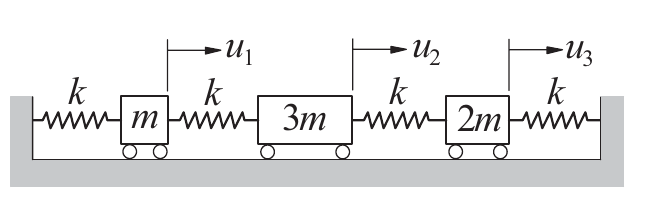
</center>

Las ecuaciones diferenciales que describen el movimiento del sistema masa-resorte son:

$$
k \left( -2u_1 + u_2 \right) = m\ddot{u}_1
$$

$$
k(u_1 - 2u_2 + u_3) = 3m\ddot{u}_2
$$

$$
k(u_2 - 2u_3) = 2m\ddot{u}_3
$$

donde:
- $u_i(t)$ representa el desplazamiento de la masa $i$ desde su posición de equilibrio.
- $k$ es la constante de los resortes.
- $m$ es la masa.

Determinar las frecuencias de vibración ($\omega$) en términos de $\sqrt{k/m}$ y las formas modales correspondientes.

In [20]:
k = 1
m = 1

# Matriz de K (multiplicada por k)
K = k * np.array([
    [ 2, -1,  0],
    [-1,  2, -1],
    [ 0, -1,  1]
])

# Matriz de masa M (multiplicada por m)
M = m * np.array([
    [1, 0, 0],
    [0, 3, 0],
    [0, 0, 2]
])

# Resolver el problema de autovalores generalizado: K x = λ M x
eigenvals, eigenvecs = eigh(K, M)

# Frecuencias naturales
omega = np.sqrt(eigenvals)

# Normalizamr
modes = eigenvecs / np.max(np.abs(eigenvecs), axis=0)


print("Frecuencias naturales (ω) en unidades de sqrt(k/m):")
print(omega)

print("\nFormas modales (normalizadas):")
print(modes)


Frecuencias naturales (ω) en unidades de sqrt(k/m):
[0.29648397 0.92257841 1.49251901]

Formas modales (normalizadas):
[[ 0.43104215 -0.61130907 -1.        ]
 [ 0.82419451 -0.70230186  0.22761299]
 [ 1.          1.         -0.06587499]]
